<a href="https://colab.research.google.com/github/NgoMinhQuang/project_cuoi_ki_AI/blob/main/FaceShape(realtime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dự đoán hình dạng khuôn mặt**

Sau khi up các tập dữ liệu về độ tuổi, giới tính, hình dạng khuôn mặt lên Google Drive thì việc đầu tiên cần làm là cho phép Google Colab truy cập vào Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tiếp theo, ta sẽ import các thư viện cần thiết cho chương trình.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import cv2
import os
from os import listdir
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Tạo tên class tương ứng với dữ liệu đầu vào (ở đây ta thực hiện cho bài toán dự đoán hình dạng khuôn mặt nên chia thành 5 class tương ứng là: heart – mặt trái tim, oblong – mặt thuôn dài, oval – mặt trái xoan, round – mặt tròn, square – mặt vuông).

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
folder1 = '/content/drive/MyDrive/data/FaceShape/Heart'
folder2 = '/content/drive/MyDrive/data/FaceShape/Oblong'
folder3 = '/content/drive/MyDrive/data/FaceShape/Oval'
folder4 = '/content/drive/MyDrive/data/FaceShape/Round'
folder5 = '/content/drive/MyDrive/data/FaceShape/Square'
photos, labels = list(), list()
for file in listdir(folder1):
  photo = load_img(folder1+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(0) 
for file in listdir(folder2):
  photo = load_img(folder2+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(1) 
for file in listdir(folder3):
  photo = load_img(folder3+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(2) 
for file in listdir(folder4):
  photo = load_img(folder4+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(3) 
for file in listdir(folder5):
  photo = load_img(folder5+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(4) 
photos = asarray(photos)            #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)            #lưu dữ liệu phân loại dạng mảng
class_name = ['Faceshape: Heart','Faceshape: Oblong','Faceshape: Oval','Faceshape: Round','Faceshape: Square']   #tạo tên class tương ứng với dữ liệu phân loại
print(photos.shape, labels.shape, class_name)


(4005, 150, 150, 3) (4005,) ['Faceshape: Heart', 'Faceshape: Oblong', 'Faceshape: Oval', 'Faceshape: Round', 'Faceshape: Square']


Tạo dữ liệu với 75% dành cho việc training và 25% dành cho việc test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=5)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(3003, 150, 150, 3) (1002, 150, 150, 3)
(3003,) (1002,)


Show 9 ảnh ngẫu nhiên dưới dạng ma trận 3x3.

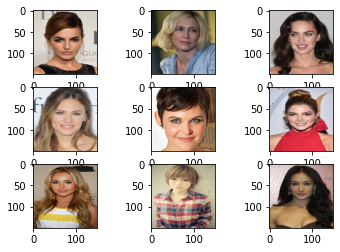

In [ ]:
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

Thực hiện quá trình chuẩn hóa dữ liệu.

In [ ]:
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

Tạo mô hình mạng CNN với 3 lớp (Convolution, ReLU, Max Pooling).

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

Sau đó ta tiến hành training dữ liệu để máy tính học 200 lần với batch_size =32 (batch_size là số lượng mẫu trong 1 lần huấn luyện, batch_size =32 nghĩa là 1 lần lặp ta sẽ cho ngẫu nhiên 32 bức hình chạy lan truyền tiến trong mạng CNN). Sau khi training xong ta sẽ thu được một file model.

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(5, activation='Softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=32,epochs=200,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/faceshape_1.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
94/94 [==============================] - 16s 42ms/step - loss: 1.8018 - accuracy: 0.2098 - val_loss: 1.6074 - val_accuracy: 0.1886
Epoch 2/200
94/94 [==============================] - 3s 32ms/step - loss: 1.6033 - accuracy: 0.2391 - val_loss: 1.5879 - val_accuracy: 0.2844
Epoch 3/200
94/94 [==============================] - 3s 32ms/step - loss: 1.5553 - accuracy: 0.3007 - val_loss: 1.5556 - val_accuracy: 0.2854
Epoch 4/200
94/94 [==============================] - 3s 35ms/step - loss: 1.4931 - accuracy: 0.3493 - val_loss: 1.5199 - val_accuracy: 0.3263
Epoch 5/200
94/94 [==============================] - 3s 32ms/step - loss: 1.4019 - accuracy: 0.4163 - val_loss: 1.5276 - val_accuracy: 0.3333
Epoch 6/200
94/94 [==============================] - 3s 32ms/step - loss: 1.2996 - accuracy: 0.4749 - val_loss: 1.5806 - val_accuracy: 0.3293
Epoch 7/200
94/94 [==============================] - 3s 33ms/step - loss: 1.1712 - accuracy: 0.5398 - val_loss: 1.5398 - val_accuracy: 0.3423
Epoch

Tiếp theo ta sẽ đi vẽ đồ thị về sai số kiểm tra và độ chính xác kiểm tra.

Sai số kiểm tra là:  8.385550498962402
Độ chính xác kiểm tra là:  0.37425148487091064


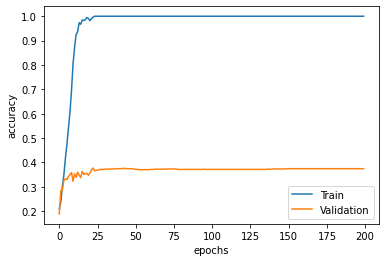

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Validation'])
plt.show()